# Автокорреляция и стационарность

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову

Загрузите ряд, например, так:

milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

 и постройте его график.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';')

In [3]:
milk.head()

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


([<matplotlib.axis.XTick at 0x7ff1b943ce90>,
 <a list of 10 Text xticklabel objects>)

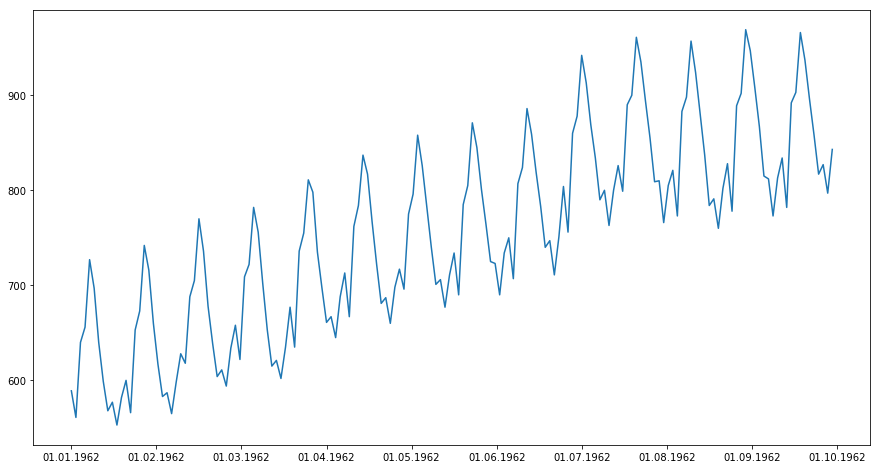

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(milk['month'], milk['milk'])
plt.xticks(np.linspace(0, len(milk['month']), 10), list(milk['month']))

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Это делается так:

import statsmodels.api as sm

sm.tsa.stattools.adfuller(ряд)

Чему равен полученный достигаемый уровень значимости?

In [5]:
import statsmodels.api as sm

In [6]:
sm.tsa.stattools.adfuller(milk['milk'].values)[1]

0.627426708603034

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период.

In [7]:
new_time_row = []
for i in range(len(milk['milk'])):
    days_in_month = pd.Period("-".join([milk['month'][i][3:5], milk['month'][i][6:]])).days_in_month
    new_time_row.append(float(milk['milk'][i]) / days_in_month)

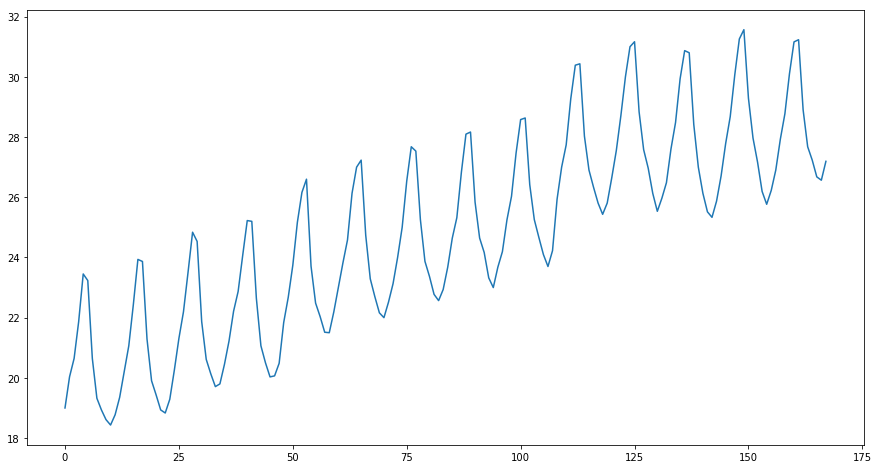

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(new_time_row)

In [9]:
sum(new_time_row)

4166.326661899464